In [40]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from collections import Counter

In [41]:
data0 = pd.read_csv('movies_metadata.csv')
movies = pd.DataFrame(data0)
#data1 = pd.read_csv('ratings.csv')
#ratings = pd.DataFrame(data1)
data3 = pd.read_csv('keywords.csv')
keywords = pd.DataFrame(data3)
data4 = pd.read_csv('credits.csv')
credits = pd.DataFrame(data4)
credits.drop(columns = 'crew', inplace = True)
movies.drop(columns = ['homepage','spoken_languages','poster_path','status','video','belongs_to_collection','adult','production_companies','production_countries','revenue','title'],inplace = True)

C:\Users\Elarb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
movies.head(3)

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,tagline,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,1995-10-30,81.0,NaN,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,1995-12-15,104.0,Roll the dice and unleash the excitement!,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0


In [43]:
#ratings.head(3)

In [44]:
keywords.head(3)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [45]:
credits.head(3)

,cast,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",15602


In [46]:
movies.shape[0]

45466

# Fixing the genre :
+ "[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"  becomes  ['Animation','Comedy','Fami']

In [47]:
def fixing_genre():
    for i in range(movies.shape[0]):
        pc1 = 0
        pc2 = 0
        j =[]
        while len(movies['genres'][i].split("'")) > 5+pc1+pc2 :
            j.append(movies['genres'][i].split("'")[5+pc1+pc2])
            pc1 = pc1+5
            pc2 = pc2+1
        print (i,j)
        movies['genres'][i] = j
    movies.to_csv('moviesbe.csv', index=False)#it takes too much time so I saved it in mvoiesbe, to avoid re running it.
data0 = pd.read_csv('moviesbe.csv')
movies = pd.DataFrame(data0)
movies['id'] = movies[['id']].apply(pd.to_numeric,errors = 'coerce')#converting the column id to float so it can be used to merge movies with rating
null_in_id = np.array(pd.Series(movies[movies['id'].isnull()].index).values)
movies.drop(null_in_id,inplace = True)#getting rid of the null values in id
movies['overview'][movies['overview'].isnull()] = 'No Overview available'#changing the NaN to 'No Overview available'
movies['tagline'][movies['tagline'].isnull()]  = 'No tagline available'#changing the NaN to 'No tagline available'
movies['genres'] = movies['genres'].apply(literal_eval)#converting the genre column from string to array
movies['id'] = movies['id'].astype('int')
movies.head()

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,tagline,vote_average,vote_count
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,No tagline available,7.7,5415.0
1,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,Roll the dice and unleash the excitement!,6.9,2413.0
2,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0
3,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,Friends are the people who let you be yourself...,6.1,34.0
4,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519000000001,1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,5.7,173.0


In [48]:
def ordering_and_arranging_movies():#removing columns and changing their order and sorting movies by id
    h = movies.sort_values('id')
    h = h[['id','original_title','release_date','genres','tagline','overview','popularity','vote_average','vote_count','budget']]
    h.to_csv('moviesbee.csv',index = False)
ordering_and_arranging_movies()
data0 = pd.read_csv('moviesbee.csv')
movies = pd.DataFrame(data0)

# Fixing keywords
+ "[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]" becomes ['jealousy','toy','boy','friendship','friends','rivalry','boy next door','new toy','toy comes to life']

In [49]:
def fixing_keywords():
    for i in range(keywords.shape[0]):
        j =[]
        for x in range(len(keywords['keywords'][i].split("}"))):
            j.append(keywords['keywords'][i].split("}")[x].split(": '")[-1][:-1:])
        print (i,j[:-1])
        keywords['keywords'][i] = j[:-1]
    keywords.to_csv('keywordsbe.csv', index=False)#it takes too much time so I saved it in keywordsbe, to avoid re running it.
data3 = pd.read_csv('keywordsbe.csv')
keywords = pd.DataFrame(data3)
keywords['keywords'] = keywords['keywords'].apply(literal_eval)#converting from strings to array
keywords.head()

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [50]:
def ordering_and_arranging_keywords(): #sorting them by id
    h = keywords.sort_values('id')
    h.to_csv('keywordsbee.csv',index = False)
ordering_and_arranging_keywords()
data3 = pd.read_csv('keywordsbee.csv')
keywords = pd.DataFrame(data3)

In [51]:
def ordering_and_arranging_ratings():#grouping the rating by movieId ,rating,userId
    h = ratings.groupby(['movieId','rating','userId']).sum()
    h.to_csv('ratingsbe.csv')#taking too much time 
data1 = pd.read_csv('ratingsbe.csv')
ratings = pd.DataFrame(data1)
ratings.head()

,movieId,rating,userId,timestamp
0,1,0.5,670,1444964588
1,1,0.5,1636,1160159624
2,1,0.5,1867,1176928549
3,1,0.5,3191,1441317435
4,1,0.5,4177,1498293720


In [52]:
credits.cast.iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

# Fixing credits
+ cleaning the credits and turning it to  [('name : Tom Hanks', 'gender : 2'), ('name : Don Rickles', 'gender : 2'), ('name : Wallace Shawn', 'gender : 2'), ('name : Annie Potts', 'gender : 1'), ('name : Erik von Detten', 'gender : 2'), ('name : R. Lee Ermey', 'gender : 2'), ('name : Penn Jillette', 'gender : 2')]
+ adding two columns , one with the names and the other one with their corresponding gender

In [53]:
def fixing_credits_cast():
    credits['names']= 'name'
    credits['gender']= 'gender'
    for i in range(credits.shape[0]):
        if credits['cast'].iloc[i]!= '[]':
            j = []
            u = []
            v = []
            x = 1
            while len(credits['cast'].iloc[i].split('credit_id'))> x :
                j.append(('name : '+credits['cast'].iloc[i].split('credit_id')[x].split(", '")[3].split("'")[-2],'gender :' +credits['cast'].iloc[i].split('credit_id')[x].split(", '")[1].split("':")[-1] ))
                u.append(credits['cast'].iloc[i].split('credit_id')[x].split(", '")[3].split("'")[-2])
                v.append(int(credits['cast'].iloc[i].split('credit_id')[x].split(", '")[1].split("':")[-1] ))
                x = x+2
            credits['names'].iloc[i]=u 
            credits['gender'].iloc[i] = v
            credits['cast'].iloc[i] = j
            print (i)
    credits.to_csv('creditscastfixing.csv', index=False)#it takes too much time so I saved it in creditscastfixing, to avoid re running it.
data4 = pd.read_csv('creditscastfixing.csv')
credits = pd.DataFrame(data4)
credits['names'][credits['names'] == 'name'] = '[]'
credits['gender'][credits['gender'] == 'gender'] = '[]'
credits['gender'] = credits['gender'].apply(literal_eval)#converting the gender column from string to array
credits.head()

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,cast,id,names,gender
0,"[('name : Tom Hanks', 'gender : 2'), ('name : ...",862,"['Tom Hanks', 'Don Rickles', 'Wallace Shawn', ...","[2, 2, 2, 1, 2, 2, 2]"
1,"[('name : Robin Williams', 'gender : 2'), ('na...",8844,"['Robin Williams', 'Kirsten Dunst', 'Bonnie Hu...","[2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0]"
2,"[('name : Walter Matthau', 'gender : 2'), ('na...",15602,"['Walter Matthau', 'Ann-Margret', 'Daryl Hanna...","[2, 1, 1, 2]"
3,"[('name : Whitney Houston', 'gender : 1'), ('n...",31357,"['Whitney Houston', 'Loretta Devine', 'Gregory...","[1, 1, 2, 2, 2]"
4,"[('name : Steve Martin', 'gender : 2'), ('name...",11862,"['Steve Martin', 'Martin Short', 'George Newbe...","[2, 2, 2, 2, 1, 2]"


In [55]:
def proba_of_being_a_male_or_female():#to change the 0 to either male or female
    m = 0
    f = 0
    total = 0
    z = 0 
    for x in range(credits.shape[0]):
        print(total,m,f)
        for i in credits['gender'][x]:
            if i == 2:
                m = m+1
                total = total +1# to don't count the 0
            elif i ==1:
                f = f+1
                total = total + 1# to don't count the 0
            elif i == 0:
                z = z+1
    return(m/total,f/total,z)
 
#proba_m , proba_f ,zero= proba_of_being_a_male_or_female() #takes some time so I just run it once and save the result
proba_m = 0.680375067216347
proba_f = 0.319624932783653
zero =113750
def fixing_gender0():#I voluntarly kept the gender 0 in the cast
    j= []
    h = np.random.rand(zero)
    n = -1
    for i in h:
        if i<=proba_m:
            j.append(2)
        else:
            j.append(1)
    j = np.array(j)
    for x in range(credits.shape[0]):
        print (x,n)
        for i in range(len(credits['gender'][x])):
            if credits['gender'][x][i] == 0:
                n = n+1
                credits['gender'][x][i] = j[n]
    credits.to_csv('creditsbe0.csv', index=False)#it takes too much time so I saved it in creditsbe, to avoid re running it.
data4 = pd.read_csv('creditsbe0.csv')
credits = pd.DataFrame(data4)
credits['gender'] = credits['gender'].apply(literal_eval)#converting the gender column from string to array
credits.head()

,cast,id,names,gender
0,"[('name : Tom Hanks', 'gender : 2'), ('name : ...",862,"['Tom Hanks', 'Don Rickles', 'Wallace Shawn', ...","[2, 2, 2, 1, 2, 2, 2]"
1,"[('name : Robin Williams', 'gender : 2'), ('na...",8844,"['Robin Williams', 'Kirsten Dunst', 'Bonnie Hu...","[2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2]"
2,"[('name : Walter Matthau', 'gender : 2'), ('na...",15602,"['Walter Matthau', 'Ann-Margret', 'Daryl Hanna...","[2, 1, 1, 2]"
3,"[('name : Whitney Houston', 'gender : 1'), ('n...",31357,"['Whitney Houston', 'Loretta Devine', 'Gregory...","[1, 1, 2, 2, 2]"
4,"[('name : Steve Martin', 'gender : 2'), ('name...",11862,"['Steve Martin', 'Martin Short', 'George Newbe...","[2, 2, 2, 2, 1, 2]"


In [56]:
def ordering_and_arranging_credits():#sorting by id and removing a column 
    h = credits.sort_values('id')
    h = h[['id','cast','names','gender']]
    h.to_csv('creditsbee.csv',index = False)
ordering_and_arranging_credits()
data4 = pd.read_csv('creditsbee.csv')
credits = pd.DataFrame(data4)
credits.head()

,id,cast,names,gender
0,2,"[('name : Turo Pajala', 'gender : 0'), ('name ...","['Turo Pajala', 'Matti Pellonpää']","[2, 2]"
1,3,"[('name : Matti Pellonpää', 'gender : 2'), ('n...","['Matti Pellonpää', 'Sakari Kuosmanen', 'Kylli...","[2, 2, 1, 2]"
2,5,"[('name : Tim Roth', 'gender : 2'), ('name : J...","['Tim Roth', 'Jennifer Beals', 'Marisa Tomei',...","[2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1]"
3,6,"[('name : Emilio Estevez', 'gender : 2'), ('na...","['Emilio Estevez', 'Denis Leary', 'Peter Green...","[2, 2, 2, 1, 2, 1, 1, 2]"
4,11,"[('name : Mark Hamill', 'gender : 2'), ('name ...","['Mark Hamill', 'Carrie Fisher', 'Alec Guinnes...","[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."


In [57]:
movies.head(1)

,id,original_title,release_date,genres,tagline,overview,popularity,vote_average,vote_count,budget
0,2,Ariel,1988-10-21,"['Drama', 'Crime']",No tagline available,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,7.1,44.0,0


In [58]:
credits.head(1)

,id,cast,names,gender
0,2,"[('name : Turo Pajala', 'gender : 0'), ('name ...","['Turo Pajala', 'Matti Pellonpää']","[2, 2]"


In [59]:
keywords.head(1)

,id,keywords
0,2,"['underdog', 'prison', 'factory worker', 'pris..."


In [60]:
ratings.rename(columns = {'movieId':'id'},inplace = True)
ratings.drop(columns = 'timestamp',inplace = True)
ratings.head(1)

,id,rating,userId
0,1,0.5,670


In [61]:
def final():#merging the datasets excluding ratings
    h = movies.merge(keywords,how='left',on='id').merge(credits,how='left',on='id').fillna('[]')
    h.drop_duplicates(subset = 'id',inplace = True)#removing the movies that are repeated
    h = h[['id','original_title','release_date','genres','keywords','tagline','overview','budget','popularity','vote_average','vote_count','names','gender']]
    h.to_csv('final.csv')#saving it
final()
data5 = pd.read_csv('final.csv')
final = pd.DataFrame(data5)
final['genres'] = final['genres'].apply(literal_eval)
final.drop(columns = 'Unnamed: 0',inplace = True)

In [62]:
final.head(1)

,id,original_title,release_date,genres,keywords,tagline,overview,budget,popularity,vote_average,vote_count,names,gender
0,2,Ariel,1988-10-21,"[Drama, Crime]","['underdog', 'prison', 'factory worker', 'pris...",No tagline available,Taisto Kasurinen is a Finnish coal miner whose...,0,3.860491000000001,7.1,44.0,"['Turo Pajala', 'Matti Pellonpää']","[2, 2]"


In [63]:
final[final['popularity']=='[]'] # id 82663 122662 249260
final[final['vote_average']=='[]']# id 82663 122662 249260
final[final['vote_count']=='[]']# id 82663 122662 249260
checking0 = final['id'][final['names']=='[]'].values == final['id'][final['gender']=='[]'].values
checking0.any() == False #checking id the missing values of names are the same for the gender

False

In [64]:
final = pd.DataFrame(data5)
final.drop(columns = 'Unnamed: 0',inplace = True)
print ('total shape: '+str(final.shape[0]),'\ntotal of movies not including a budget: '+str(final[final['budget']==0].shape[0])) 
final.drop(columns = 'budget',inplace = True )#most of them are missing the budget, we should then drop this column

total shape: 45433 
total of movies not including a budget: 36553


In [65]:
bypop = final[~(final['popularity']=='[]')] # is the same for vote_average and vote_count
byact = final[~(final['names']=='[]')]# is the same for names and gender

# By Popularity :

In [66]:
bypop = final[~(final['popularity']=='[]')] 
bypop['popularity'] = bypop['popularity'].astype(float)
bypop['vote_count'] = bypop['vote_count'].astype(float)
bypop['vote_average'] = bypop['vote_average'].astype(float)
bypop['id'] = bypop['id'].astype(str)

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

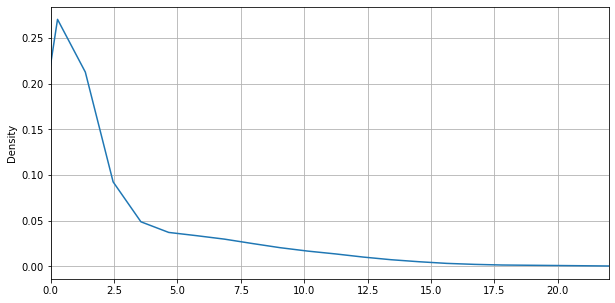

In [67]:

h =bypop['popularity'].plot(kind= 'density',grid=[2,3,4],figsize = [10,5],xlim = [0,22])#too many values near 0 we should then set a limit to the x axis to make the plot more clear

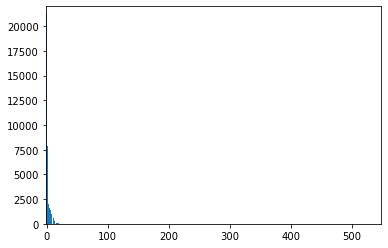

In [68]:
h =bypop['popularity'].values.astype(int)
c = Counter(h)

plt.bar(c.keys(), c.values())
plt.axis([-1,547,0,22000])
plt.show()# counting the nbr of movies that have the same int(popularity) and plotting them

In [69]:
def dividing_by_power_of_10_to_fit_in_graph():
    arr_val = []
    arr_ind = []
    z = bypop['popularity'].astype(int).values
    for i in bypop['popularity'].astype(int).unique():
        arr_val.append(((i,len(z[z == i]))))#appending the value int(popularity) and the number of movies with the same int(popularity) as a tuple to arr_val
        arr_ind.append(len(z[z == i]))#appending only the number of movies that have the same int(popularity) to arr_ind
    print (arr_ind)
    print(len(str(min(arr_ind)//10)),len(str(max(arr_ind)//10)))
    range_of_n = np.arange(len(str(min(arr_ind)//10)),len(str(max(arr_ind)//10))+1)#making a numpy array ranging from 1 to 4
    arr_ind = []
    for i in arr_val:
        xx = len(str(i[1]//10))
        exec('arr_val'+str(xx)+ '=[]')#assigning to arr_val1 to arr_val4 an empty list
    for i in range_of_n:
        arr_ind.append('arr_val'+str(i))#keeping track of the variables
    for i in arr_val :
        xx = len(str(i[1]//10))
        exec('arr_val'+str(xx)+'.append(i)')#appending to arr_val1 to arr_val4 an empty list the different popularities that have the same xx
    j =[]
    for i in arr_ind:
        j.append([])
    z = 3
    for i in (arr_ind):
        exec('neverused='+i)
        exec('j[z] = neverused') #3 2 1 0 
        z = z-1
    inteach = []
    for i in j:
        temp_m = []
        for x in range(len(i)):
            temp_m.append(i[x][0])
        inteach.append((min(temp_m),max(temp_m)+1))
    return(arr_ind,arr_val,j,inteach)
arr_ind,arr_val, arr_val_sep,intervals = dividing_by_power_of_10_to_fit_in_graph()

[2044, 3512, 857, 1573, 3, 11, 2, 36, 144, 696, 16, 253, 7852, 2, 62, 305, 21231, 441, 10, 608, 15, 1439, 994, 1259, 55, 1, 111, 19, 1656, 4, 71, 6, 1, 10, 7, 1, 10, 24, 3, 1, 7, 11, 7, 3, 2, 1, 7, 7, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
1 4


In [70]:
intervals

[(0, 1), (1, 8), (8, 17), (17, 548)]

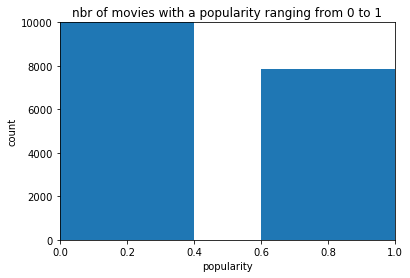

In [71]:
plt.bar(c.keys(), c.values())
plt.axis([0,1,0,10000])
plt.title('nbr of movies with a popularity ranging from 0 to 1')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

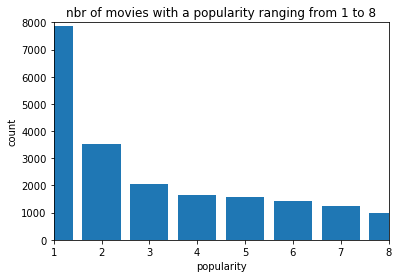

In [72]:
plt.bar(c.keys(), c.values())
plt.axis([1,8,0,8000])
plt.title('nbr of movies with a popularity ranging from 1 to 8')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

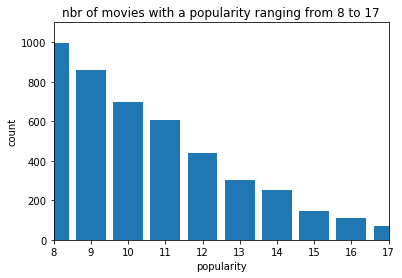

In [73]:
plt.bar(c.keys(), c.values())
plt.axis([8,17,0,1100])
plt.title('nbr of movies with a popularity ranging from 8 to 17')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

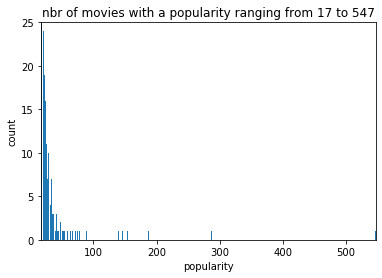

In [74]:
plt.bar(c.keys(), c.values())
plt.axis([17,547,0,25])
plt.title('nbr of movies with a popularity ranging from 17 to 547')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

# We are going to sort by popularity based on the assumption that there are less popular movies than unpopular ones . the range of the popularity is [0,548)

## let $ x $ be the value of the popularity of a given movie
## let $ y $ be the number of movies that have the same $int(x)$
## let $ n $  be the smallest integer possible such as $10^{n+1} >= y$ 
##  the first stage of this of recommending movies by popularity will be defined by the number, n , such as the the movies will be sorted depending on their n.
## this has already be done in the fucntion dividing_by_power_of_10_to_fit_in_graph()

In [75]:
print (intervals)
print (arr_ind)

[(0, 1), (1, 8), (8, 17), (17, 548)]
['arr_val1', 'arr_val2', 'arr_val3', 'arr_val4']


## for x  in $ [17, 548), n = 1$  
## for x in $  [8, 17), n = 2$
## for x in $  [1, 8), n = 3$
## for x in $  [0, 1), n = 4$

# but for the sake of having a better notation we have changed the order:

## for x  in $ [17, 548), n = 4$  
## for x in $  [8, 17), n = 3$
## for x in $  [1, 8), n = 2$
## for x in $  [0, 1), n = 1$

In [76]:
bypop = final[~(final['popularity']=='[]')] 
bypop['popularity'] = bypop['popularity'].astype(float)
bypop['vote_count'] = bypop['vote_count'].astype(float)
bypop['vote_average'] = bypop['vote_average'].astype(float)
bypop['id'] = bypop['id'].astype(str)
bypop['f_order'] = 0
mask4 = bypop[bypop['popularity']>= 17.0][bypop['popularity']<548.0]
mask3 = bypop[bypop['popularity']>= 8.0][bypop['popularity']<17.0]
mask2 = bypop[bypop['popularity']>= 1.0][bypop['popularity']<8.0] 
mask1 = bypop[bypop['popularity']>= 0.0][bypop['popularity']<1.0] 
bypop['id'][bypop['popularity']>=0] #=4
print (len(mask1[mask1['vote_count']==0.0]))
mask1['f_order']= 1 # 2833 values with no vote count
print (len(mask2[mask2['vote_count']==0.0]))
mask2['f_order']=2 #61 values with no vote count
print (len(mask3[mask3['vote_count']==0.0]))
mask3['f_order']=3 #0 values with no vote count 
print (len(mask4[mask4['vote_count']==0.0]))
mask4['f_order']=4# 2 values with no vote count
mask1['names'] = mask1['names'].apply(literal_eval)#converting the name column from string to array
mask2['names'] = mask2['names'].apply(literal_eval)#converting the name column from string to array
mask3['names'] = mask3['names'].apply(literal_eval)#converting the name column from string to array
mask4['names'] = mask4['names'].apply(literal_eval)#converting the name column from string to array




mask4[mask4['vote_count']==0.0]

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

2833
61
0
2


,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order
33136,141052,Justice League,2017-11-15,"[Action, Adventure, Fantasy, Science Fiction]","['dc comics', 'based on comic', 'super powers'...",No tagline available,Fueled by his restored faith in humanity and i...,25.944629,0.0,0.0,"[Ben Affleck, Gal Gadot, Ezra Miller, Ciarán H...","[2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2]",4
40137,284053,Thor: Ragnarok,2017-10-25,"[Action, Adventure, Fantasy, Science Fiction]","['marvel comic', 'sequel', 'superhero', 'based...",No tagline available,Thor is imprisoned on the other side of the un...,57.283628,0.0,0.0,"[Chris Hemsworth, Cate Blanchett, Jeff Goldblu...","[2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1]",4


## There are some movies with no vote count, so it means that they are also missing the vote_average. to compensate on this lack of data, we are going to proceed this way:
### let $x$  be a given movie with no vote_count
### let $y$ be all the actors, referenced to by $i$, of a given movie 
### let $n$ be the number of all the actors of a given movie x
### let $z$ be all the vote_average of the movies in which an actor in y acted
### for every $x$ , the $vote count =  \sum_{i=0}^{n} average(z)$

In [77]:
def temp():# intermediary step to fix the rows with no vote count
    bypop = final[~(final['popularity']=='[]')] 
    bypop['popularity'] = bypop['popularity'].astype(float)
    bypop['vote_count'] = bypop['vote_count'].astype(float)
    bypop['vote_average'] = bypop['vote_average'].astype(float)
    bypop['id'] = bypop['id'].astype(str)
    bypop['names'] = bypop['names'].apply(literal_eval)
    temp = bypop.apply(lambda x: pd.Series(x['names']),axis=1).stack().reset_index(level=1, drop=True)
    return(temp)
temp = temp()

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [78]:
for g in range(len(mask4['names'][mask4['vote_count']==0.0])):
    nam = []
    ind = []
    jtemp = []
    pc = 0
    titre = mask4['original_title'][mask4['vote_count']==0.0].iloc[g]
    for x in mask4['names'][mask4['vote_count']==0.0].iloc[g]:
        #print(temp[temp == x])
        for u in temp[temp == x].index:
            ind.append(u)
    for x in mask4['names'][mask4['vote_count']==0.0].iloc[g]:
        for u in temp[temp == x]:
            u = u.replace(' ','_')
            u = u.replace('.','')
            jtemp.append(u)
    for x in mask4['names'][mask4['vote_count']==0.0].iloc[g]:
        x = x.replace(' ','_')
        x = x.replace('.','')
        nam.append(x)
        exec(x.replace(' ','_') + "=[]")
    for i in nam:
        vv =len(np.array(jtemp)[np.array(jtemp) ==i])
        for x in ind[pc:pc+len(np.array(jtemp)[np.array(jtemp) ==i])]:
            exec(i +".append(bypop.iloc[x]['vote_average'])")
            pc = len(np.array(jtemp)[np.array(jtemp) ==i])
    for i in nam:
        exec('n='+i)
        exec( i+ '=sum('+i+') / len('+i+')')
    vote_avr =0
    for n,i in enumerate(nam) :
        exec('vote_avr=vote_avr+'+i)
    vote_avr = vote_avr/n
    print (titre,vote_avr)
    mask4['vote_average'][mask4['original_title']==titre] = vote_avr
mask4.to_csv('mask4.csv')

Justice League 6.557667272205006


C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Thor: Ragnarok 6.574065945725609


In [ ]:
for g in range(len(mask1['names'][mask1['vote_count']==0.0])):
    nam = []
    ind = []
    jtemp = []
    pc = 0
    titre = mask1['original_title'][mask1['vote_count']==0.0].iloc[g]
    #print (titre)
    for x in mask1['names'][mask1['vote_count']==0.0].iloc[g]:
        #print(temp[temp == x])
        for u in temp[temp == x].index:
            ind.append(u)
    for x in mask1['names'][mask1['vote_count']==0.0].iloc[g]:
        for u in temp[temp == x]:
            u=u.replace("\\",'')
            u=u.replace("t\\t",'')
            u = u.replace(',','')
            u = u.replace(': "','')
            u = u.replace('-','_')
            u = u.replace(' ','_')
            u = u.replace('.','')
            u=u.replace("’",'')
            u=u.replace("/",'')
            jtemp.append(u)
    for x in mask1['names'][mask1['vote_count']==0.0].iloc[g]:
        x=x.replace("\\",'')
        x=x.replace("t\\t",'')
        x = x.replace(',','')
        x = x.replace(': "','')
        x = x.replace('-','_')
        x = x.replace(' ','_')
        x = x.replace('.','')
        x = x.replace("'",'')
        x=x.replace("’",'')
        x=x.replace("/",'')
        nam.append(x)
        exec(x.replace(' ','_') + "=[]")
    for i in nam:
        vv =len(np.array(jtemp)[np.array(jtemp) ==i])
        for x in ind[pc:pc+len(np.array(jtemp)[np.array(jtemp) ==i])]:
            #print(bypop.loc[x]['vote_average'])
            exec(i +".append(bypop.loc[x]['vote_average'])")
            exec('n='+i)
            #print(i,n)
            pc = len(np.array(jtemp)[np.array(jtemp) ==i])
    for i in nam:
        exec('n='+i)
        if n == []:
            nam.remove(i)
    for i in nam:
        exec('n='+i)
        if n!= []:
            exec( i+ '=sum('+i+') / len('+i+')')
    vote_avr =0
    for n,i in enumerate(nam) :
        #print(i,n)
        exec('nn='+i)
        #print(nn)
        exec('vote_avr=vote_avr+'+i)
        #print (vote_avr)
    vote_avr = vote_avr/(n+1)
    print (titre,vote_avr)
    mask1['vote_average'][mask1['original_title']==titre] = vote_avr
mask1.to_csv('mask1.csv')

In [42]:
for g in range(len(mask2['names'][mask2['vote_count']==0.0])):
    nam = []
    ind = []
    jtemp = []
    pc = 0
    for x in mask2['names'][mask2['vote_count']==0.0].iloc[g]:
        titre = mask2['original_title'][mask2['vote_count']==0.0].iloc[g]
        #print(temp[temp == x])
        for u in temp[temp == x].index:
            ind.append(u)
    for x in mask2['names'][mask2['vote_count']==0.0].iloc[g]:
        for u in temp[temp == x]:
            u = u.replace(' ','_')
            u = u.replace('.','')
            u = u.replace(',','')
            u = u.replace('-','_')
            u = u.replace(' ','_')
            u = u.replace('.','')
            jtemp.append(u)
    for x in mask2['names'][mask2['vote_count']==0.0].iloc[g]:
        x = x.replace(',','')
        x = x.replace('-','_')
        x = x.replace(' ','_')
        x = x.replace('.','')
        nam.append(x)
        exec(x+ "=[]")
    for i in nam:
        vv =len(np.array(jtemp)[np.array(jtemp) ==i])
        for x in ind[pc:pc+len(np.array(jtemp)[np.array(jtemp) ==i])]:
            exec(i +".append(bypop.iloc[x]['vote_average'])")
            pc = len(np.array(jtemp)[np.array(jtemp) ==i])
    for i in nam:
        exec('n='+i)
        if n == []:
            nam.remove(i)
    for i in nam:
        exec('n='+i)
        if n!= []:
            exec( i+ '=sum('+i+') / len('+i+')')
    vote_avr =0
    for n,i in enumerate(nam) :
        exec('nn='+i)
        exec('vote_avr=vote_avr+'+i)
    vote_avr = vote_avr/(n+1)
    print (titre,vote_avr)
    mask2['vote_average'][mask2['original_title']==titre] = vote_avr
mask2.to_csv('mask2.csv')

Infinity 6.196527777777778
Fallout 4.521111111111111
Duel of Hearts 4.551709401709402
Jingle Bells 5.64072463768116
Project X 5.865445741049457
Just a Kiss 5.459664224664224
Longshot 2.617207792207792
Vild på sex 0.0
Hana to hebi: kyûkyoku nawa chôkyô 7.13125
Made In Paris 5.689983069689645
Toomorrow 6.167857142857143
Misa mi 5.357142857142858
Kiss and Tell 6.337820512820513
Un buco in fronte 7.503703703703704
Wives Under Suspicion 6.0239677938808365
Wheelmen 5.382202881152461
Sette volte sette 5.870626352813852
Vent d'est 5.777166666666667
Good Luck, Miss Wyckoff 5.248200757575757
True Love and Chaos 4.853260869565218
Les voleurs de la nuit 6.16546218487395
9500 Liberty 4.0
La Legge Violenta Della Squadra Anticrimine 6.529292929292929
The Gambler 6.6829629629629625
Lucid 5.161111111111111
The Sex and Violence Family Hour 2.605
Welcome to 18 5.883333333333333
Trade Winds 6.525223587475743
The Waiting Game 5.938888888888889
Luther 5.948966165413534
Pretty/Handsome 5.737878787878787
Die 

## Assumptions : 
+ ***the bigger the vote_count the more reliable the vote_average.**
+ ****if an actor appeared in only one movie, then that movie is not popular.**



## we can notice that there are still some vote_average with the value. consequently( based on the assumption**),the movies with a vote_average = 0 will be sorted based solely on their popularity within their class n.
## for the movies which vote_average is not null:
+ general case(same n, different vote_average) : ordered by vote average within their class n . 
+ special case(same n, same vote_average) : ordered using the vote_count. (based on the assumption*)

In [82]:
maskv4 = pd.DataFrame(pd.read_csv('mask4.csv'))
maskv4.drop(columns = 'Unnamed: 0',inplace = True)
maskv4.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)['s_order']= np.arange(len(mask4))
x = maskv4.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)
x['s_order']= np.arange(len(maskv4))
x.reset_index(level = 0,inplace = True)
x.drop(columns = ['vote_count','vote_average'],inplace = True)
maskv4 = maskv4.merge(x,on = 'id')
maskv4.sort_values('s_order',ascending = True,inplace = True)
maskv4[maskv4['vote_average']==0] # no missing vote_average
maskv4.head(1)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
191,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"['Comedy', 'Drama', 'Romance']",['musical'],Come... Fall In Love,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,9.1,661.0,"['Shah Rukh Khan', 'Amrish Puri', 'Satish Shah...","[2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1]",4,0


In [83]:
maskv2 = pd.DataFrame(pd.read_csv('mask2.csv'))
maskv2.drop(columns = 'Unnamed: 0',inplace = True)
maskv2.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)['s_order']= np.arange(len(mask2))
x = maskv2.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)
x['s_order']= np.arange(len(maskv2))
x.reset_index(level = 0,inplace = True)
x.drop(columns = ['vote_count','vote_average'],inplace = True)
maskv2 = maskv2.merge(x,on = 'id')
maskv2.sort_values('s_order',ascending = True,inplace = True)
maskv2[maskv2['vote_average']==0] #18 missing vote_average
maskj2temp = maskv2[maskv2['vote_average']==0].sort_values('popularity',ascending = False) #1025 vote_average
maskv2 = maskv2[maskv2['vote_average']!= 0]
maskv2 = pd.concat([maskv2,maskj2temp])
maskv2.head(1)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
17382,295011,Patient Zero,[],"['Action', 'Drama', 'Horror', 'Thriller']","['survivor', 'language', 'end of the world', '...",No tagline available,After an unprecedented global pandemic has tur...,1.083454,10.0,2.0,"['Natalie Dormer', 'Matt Smith', 'John Bradley...","[1, 2, 2, 1, 1, 1, 2, 1]",2,0


In [84]:
mask3.to_csv('mask3.csv')
maskv3 = pd.DataFrame(pd.read_csv('mask3.csv'))
maskv3.drop(columns = 'Unnamed: 0',inplace = True)
maskv3.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)['s_order']= np.arange(len(mask3))
x = maskv3.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)
x['s_order']= np.arange(len(maskv3))
x.reset_index(level = 0,inplace = True)
x.drop(columns = ['vote_count','vote_average'],inplace = True)
maskv3 = maskv3.merge(x,on = 'id')
maskv3
maskv3.sort_values('s_order',ascending = True,inplace = True)
maskv3[maskv3['vote_average']==0] #no missing vote_average
maskv3.head(1)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
4408,460135,LEGO DC Super Hero Girls: Brain Drain,2017-08-30,['Animation'],"['superhero', 'lego']",No tagline available,"When Supergirl, Wonder Woman, Batgirl, Bumbleb...",8.413734,10.0,2.0,"['Grey Griffin', 'Anais Fairweather', 'Stephan...","[1, 1, 2, 1, 1, 1, 2, 2, 1]",3,0


In [85]:
maskv1 = pd.DataFrame(pd.read_csv('mask1.csv'))
maskv1.drop(columns = 'Unnamed: 0',inplace = True)
maskv1.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)['s_order']= np.arange(len(mask1))
x = maskv1.groupby(['vote_average','vote_count','id']).sum().reset_index(level =1)[['vote_count']][::-1].reset_index(level =1)
x['s_order']= np.arange(len(maskv1))
x.reset_index(level = 0,inplace = True)
x.drop(columns = ['vote_count','vote_average'],inplace = True)
maskv1 = maskv1.merge(x,on = 'id')
maskv1
maskv1.sort_values('s_order',ascending = True,inplace = True)
maskj1temp = maskv1[maskv1['vote_average']==0].sort_values('popularity',ascending = False) #1025 vote_average
maskv1 = maskv1[maskv1['vote_average']!= 0]
maskv1 = pd.concat([maskv1,maskj1temp])
maskv1.head(1)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
20583,390991,Frankie Boyle: Hurt Like You've Never Been Loved,2016-03-18,['Comedy'],"['stand-up comedy', 'vulgarity', 'strong langu...",No tagline available,Netflix Special,0.255416,10.0,3.0,['Frankie Boyle'],[1],1,0


In [87]:
bypop_final = pd.concat([maskv4,maskv3,maskv2,maskv1])
bypop_final.index = np.arange(len(bypop_final))
bypop_final.head(10)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"['Comedy', 'Drama', 'Romance']",['musical'],Come... Fall In Love,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,9.1,661.0,"['Shah Rukh Khan', 'Amrish Puri', 'Satish Shah...","[2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1]",4,0
1,278,The Shawshank Redemption,1994-09-23,"['Drama', 'Crime']","['prison', 'corruption', 'police brutality', '...",Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...,51.645403,8.5,8358.0,"['Tim Robbins', 'Bob Gunton', 'Mark Rolston', ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,1
2,238,The Godfather,1972-03-14,"['Drama', 'Crime']","['italy', 'love at first sight', 'loss of fath...",An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,8.5,6024.0,"['Marlon Brando', 'James Caan', 'Robert Duvall...","[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, ...",4,2
3,372058,君の名は。,2016-08-26,"['Romance', 'Animation', 'Drama']","['supernatural', 'romance', 'school', 'star cr...",No tagline available,High schoolers Mitsuha and Taki are complete s...,34.461252,8.5,1030.0,"['Ryunosuke Kamiki', 'Masami Nagasawa', 'Ryou ...","[2, 1, 2, 2, 1, 1, 1]",4,3
4,155,The Dark Knight,2008-07-16,"['Drama', 'Action', 'Crime', 'Thriller']","['dc comics', 'crime fighter', 'secret identit...",Why So Serious?,Batman raises the stakes in his war on crime. ...,123.167259,8.3,12269.0,"['Christian Bale', 'Heath Ledger', 'Gary Oldma...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, ...",4,4
5,550,Fight Club,1999-10-15,['Drama'],"['support group', 'dual identity', 'nihilism',...",Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,63.869599,8.3,9678.0,"['Edward Norton', 'Meat Loaf', 'Helena Bonham ...","[2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,5
6,680,Pulp Fiction,1994-09-10,"['Thriller', 'Crime']","['transporter', 'brothel', 'drug dealer', 'box...",Just because you are a character doesn't mean ...,"A burger-loving hit man, his philosophical par...",140.950236,8.3,8670.0,"['John Travolta', 'Uma Thurman', 'Ving Rhames'...","[2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, ...",4,6
7,424,Schindler's List,1993-11-29,"['Drama', 'History', 'War']","['factory', 'concentration camp', 'hero', 'hol...","Whoever saves one life, saves the world entire.",The true story of how businessman Oskar Schind...,41.725123,8.3,4436.0,"['Liam Neeson', 'Ralph Fiennes', 'Jonathan Sag...","[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1]",4,7
8,244786,Whiplash,2014-10-10,['Drama'],"['jazz', 'obsession', 'conservatory', 'music t...",The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ...",64.299990,8.3,4376.0,"['Miles Teller', 'Melissa Benoist', 'Jayson Bl...","[2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, ...",4,8
9,129,千と千尋の神隠し,2001-07-20,"['Fantasy', 'Adventure', 'Animation', 'Family']","['witch', 'parent child relationship', 'magic'...",The tunnel led Chihiro to a mysterious town...,A ten year old girl who wanders away from her ...,41.048867,8.3,3968.0,"['Rumi Hiiragi', 'Mari Natsuki', 'Yumi Tamai',...","[2, 1, 2, 1, 1, 2, 2, 2]",4,9


## Now that the movies are ordered by popularity, we will divide them by genre

In [88]:
def temp_genre():# intermediary step to divide by genre
    bypop_final['popularity'] = bypop_final['popularity'].astype(float)
    bypop_final['vote_count'] = bypop_final['vote_count'].astype(float)
    bypop_final['vote_average'] = bypop_final['vote_average'].astype(float)
    bypop_final['id'] = bypop_final['id'].astype(str)
    bypop_final['genres'] = bypop_final['genres'].apply(literal_eval)
    temp = bypop_final.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
    return(temp)
temp_genre = temp_genre()

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [89]:
def lev_dst(st0,st1):
    arr = []
    st1 = "a" + st1
    st0 = "a" + st0
    for i in range (len(st1)):
        arr.append([])
    for i in range(len(st0)):
        arr[0].append(i)
    x = 1
    arr[1].append(arr[0][0]+1)
    for i in range(len(st1)):
        for i in range(1,len(st0)):
            var1 = arr[x][i-1] +1
            var2 = arr[x-1][i] + 1 
            try:
                if st1[x] == st0[x]:
                    var3 = arr[x-1][i-1]
                else:
                    var3 = arr[x-1][i-1]+1
            except:
                var3 = arr[x-1][i-1]+1 
            if var1<=var2 and var1<= var3:
                arr[x].append(var1)
            elif var2<=var1 and var2<= var3:
                arr[x].append(var2)
            elif var3<=var2 and var3<= var1:
                arr[x].append(var3)   
        x = x+1
        try :
            arr[x].append(arr[x-1][0]+1)
        except:
            break
    return(arr[-1][-1])

In [90]:
def genre_reducing_error(gre,uni):
    array = []
    for i in uni:
        array.append((i,lev_dst(gre,i)))
    array = sorted(array,key = lambda x:x[1])
    return (array[0][0])

In [47]:
def top_by_genre(genre):
    genre = genre_reducing_error(genre,temp_genre.unique())
    print(genre)
    return bypop_final.iloc[temp_genre[temp_genre==genre].index]
top_by_genre('science fiction').head(3)

Science Fiction


,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
15,374430,Black Mirror: White Christmas,2014-12-16,"[Drama, Horror, Mystery, Science Fiction, Thri...","['artificial intelligence', 'confession', 'tec...",No tagline available,This feature-length special consists of three ...,24.910782,8.3,211.0,"['Jon Hamm', 'Oona Chaplin', 'Janet Montgomery...","[2, 1, 1, 1, 2, 2]",4,15
18,1891,The Empire Strikes Back,1980-05-17,"[Adventure, Action, Science Fiction]","['rebel', 'android', 'asteroid', 'space battle...",The Adventure Continues...,"The epic saga continues as Luke Skywalker, in ...",19.470959,8.2,5998.0,"['Mark Hamill', 'Carrie Fisher', 'Anthony Dani...","[2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...",4,18
25,27205,Inception,2010-07-14,"[Action, Thriller, Science Fiction, Mystery, A...","['loss of lover', 'dream', 'kidnapping', 'slee...",Your mind is the scene of the crime.,"Cobb, a skilled thief who commits corporate es...",29.108149,8.1,14075.0,"['Leonardo DiCaprio', 'Ellen Page', 'Ken Watan...","[2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2]",4,25
26,157336,Interstellar,2014-11-05,"[Adventure, Drama, Science Fiction]","['saving the world', 'artificial intelligence'...",Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,32.213481,8.1,11187.0,"['Matthew McConaughey', 'Anne Hathaway', 'Case...","[2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, ...",4,26
28,11,Star Wars,1977-05-25,"[Adventure, Action, Science Fiction]","['android', 'galaxy', 'hermit', 'death star', ...","A long time ago in a galaxy far, far away...",Princess Leia is captured and held hostage by ...,42.149697,8.1,6778.0,"['Mark Hamill', 'Carrie Fisher', 'Alec Guinnes...","[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,28
36,105,Back to the Future,1985-07-03,"[Adventure, Comedy, Science Fiction, Family]","['clock tower', 'car race', 'terrorist', 'delo...",He's the only kid ever to get into trouble bef...,Eighties teenager Marty McFly is accidentally ...,25.778509,8.0,6239.0,"['Michael J. Fox', 'Lea Thompson', 'Thomas F. ...","[2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, ...",4,36
39,185,A Clockwork Orange,1971-12-18,"[Science Fiction, Drama]","['prison', 'street gang', 'rape', 'adolescence...",Being the adventures of a young man whose prin...,Demonic gang-leader Alex goes on the spree of ...,17.112594,8.0,3432.0,"['Malcolm McDowell', 'Adrienne Corri', 'Warren...","[2, 1, 2, 2, 2, 1, 2, 2, 2, 2]",4,39
43,118340,Guardians of the Galaxy,2014-07-30,"[Action, Science Fiction, Adventure]","['marvel comic', 'spaceship', 'space', 'outer ...",All heroes start somewhere.,"Light years from Earth, 26 years after being a...",53.291601,7.9,10014.0,"['Chris Pratt', 'Dave Bautista', 'Bradley Coop...","[2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, ...",4,43
44,603,The Matrix,1999-03-30,"[Action, Science Fiction]","['saving the world', 'artificial intelligence'...",Welcome to the Real World.,"Set in the 22nd century, The Matrix tells the ...",33.366332,7.9,9079.0,"['Keanu Reeves', 'Carrie-Anne Moss', 'Gloria F...","[2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, ...",4,44
51,348,Alien,1979-05-25,"[Horror, Action, Thriller, Science Fiction]","['android', 'countdown', 'space marine', 'spac...",In space no one can hear you scream.,"During its return to the earth, commercial spa...",23.377420,7.9,4564.0,"['Tom Skerritt', 'Veronica Cartwright', 'John ...","[2, 1, 2, 2, 1]",4,51


In [57]:
top_by_genre('comedy').head(4)

Comedy


,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"[Comedy, Drama, Romance]",[musical],Come... Fall In Love,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,9.1,661.0,"[Shah Rukh Khan, Amrish Puri, Satish Shah, Him...","[2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1]",4,0
10,637,La vita è bella,1997-12-20,"[Comedy, Drama]","[italy, riddle, bookshop, self sacrifice, mass...","An unforgettable fable that proves love, famil...",A touching story of an Italian book seller of ...,39.394970,8.3,3643.0,"[Nicoletta Braschi, Giorgio Cantarini, Amerigo...","[1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2]",4,10
16,455661,In a Heartbeat,2017-06-01,"[Family, Animation, Romance, Comedy]","[love, teenager, lgbt, short]",The Heart Wants What The Heart Wants,A closeted boy runs the risk of being outed by...,20.821780,8.3,146.0,[],[],4,16
17,13,Forrest Gump,1994-07-06,"[Comedy, Drama, Romance]","[vietnam veteran, hippie, mentally disabled, r...","The world will never be the same, once you've ...",A man with a low IQ has accomplished great thi...,48.307194,8.2,8147.0,"[Tom Hanks, Gary Sinise, Sally Field, Hanna Ha...","[2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, ...",4,17
24,40096,O Auto da Compadecida,2000-09-10,"[Adventure, Comedy, Drama]","[brazilian, comedy]",No tagline available,The lively João Grilo and the sly Chicó are po...,23.950396,8.2,120.0,"[Matheus Nachtergaele, Lima Duarte, Denise Fra...","[2, 2, 1, 2, 2, 1, 2]",4,24
36,105,Back to the Future,1985-07-03,"[Adventure, Comedy, Science Fiction, Family]","[clock tower, car race, terrorist, delorean, l...",He's the only kid ever to get into trouble bef...,Eighties teenager Marty McFly is accidentally ...,25.778509,8.0,6239.0,"[Michael J. Fox, Lea Thompson, Thomas F. Wilso...","[2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, ...",4,36
45,150540,Inside Out,2015-06-09,"[Drama, Comedy, Animation, Family]","[dream, cartoon, imaginary friend, animation, ...",Meet the little voices inside your head.,"Growing up can be a bumpy road, and it's no ex...",23.985587,7.9,6737.0,"[Amy Poehler, Richard Kind, Lewis Black, Kaitl...","[1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, ...",4,45
50,313369,La La Land,2016-11-29,"[Comedy, Drama, Music, Romance]","[jazz, dance, passion, musical, casting, los a...",Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",19.681686,7.9,4745.0,"[Ryan Gosling, John Legend, J.K. Simmons, Call...","[2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, ...",4,50
58,14160,Up,2009-05-13,"[Animation, Comedy, Family, Adventure]","[age difference, central and south america, ba...",No tagline available,Carl Fredricksen spent his entire life dreamin...,19.330884,7.8,7048.0,"[Ed Asner, Jordan Nagai, Delroy Lindo, John Ra...","[2, 2, 2, 2, 2, 2, 2, 2]",4,58
59,177572,Big Hero 6,2014-10-24,"[Adventure, Family, Animation, Action, Comedy]","[brother brother relationship, hero, talent, r...",From the creators of Wreck-it Ralph and Frozen,The special bond that develops between plus-si...,213.849907,7.8,6289.0,"[Scott Adsit, Daniel Henney, Jamie Chung, Géne...","[2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, ...",4,59


In [91]:
temp_genre.unique()

array(['Comedy', 'Drama', 'Romance', 'Crime', 'Animation', 'Action',
       'Thriller', 'History', 'War', 'Fantasy', 'Adventure', 'Family',
       'Horror', 'Mystery', 'Science Fiction', 'TV Movie', 'Music',
       'Western', 'Documentary', 'Foreign'], dtype=object)

# Recommend movies by actor

In [92]:
def temp_actor_rec():
    bypop_final['names'] = bypop_final['names'].apply(literal_eval)
    temp = bypop_final.apply(lambda x: pd.Series(x['names']),axis=1).stack().reset_index(level=1, drop=True)
    return(temp)
temp_actor_rec = temp_actor_rec()

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
def top_by_actor(actor):
    actor = genre_reducing_error(actor,temp_actor_rec.unique())
    print(actor)
    return (bypop_final.iloc[temp_actor_rec[temp_actor_rec==actor].index])
top_by_actor('Christian Bale')

Christian Bale


,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
4,155,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]","['dc comics', 'crime fighter', 'secret identit...",Why So Serious?,Batman raises the stakes in his war on crime. ...,123.167259,8.3,12269.0,"[Christian Bale, Heath Ledger, Gary Oldman, Mo...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, ...",4,4
83,49026,The Dark Knight Rises,2012-07-16,"[Action, Crime, Drama, Thriller]","['dc comics', 'crime fighter', 'terrorist', 's...",The Legend Ends,Following the death of District Attorney Harve...,20.582580,7.6,9263.0,"[Christian Bale, Gary Oldman, Tom Hardy, Josep...","[2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, ...",4,83
102,272,Batman Begins,2005-06-10,"[Action, Crime, Drama]","['himalaya', 'martial arts', 'dc comics', 'cri...",Evil fears the knight.,"Driven by tragedy, billionaire Bruce Wayne ded...",28.505341,7.5,7511.0,"[Christian Bale, Liam Neeson, Gary Oldman, Tom...","[2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, ...",4,102
971,318846,The Big Short,2015-12-11,"[Comedy, Drama]","['bank', 'fraud', 'biography', 'wall street', ...",This is a true story.,The men who made millions from a global econom...,13.143061,7.3,2679.0,"[Christian Bale, Ryan Gosling, Melissa Leo, Jo...","[2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, ...",3,516
973,1359,American Psycho,2000-04-13,"[Thriller, Drama, Crime]","['based on novel', 'wall street', 'psychopath'...",I think my mask of sanity is about to slip.,A wealthy New York investment banking executiv...,13.686715,7.3,2128.0,"[Christian Bale, Jared Leto, Samantha Mathis, ...","[2, 2, 1, 2, 1, 1, 2, 2, 1, 1]",3,518
989,4553,The Machinist,2004-02-09,"[Thriller, Drama]","['factory', 'insomnia', 'post it', 'machinist'...",A little guilt goes a long way...,"The Machinist is the story of Trevor Reznik, a...",10.737565,7.3,1280.0,"[Christian Bale, Aitana Sánchez-Gijón, Michael...","[2, 1, 2, 1, 1, 2, 2]",3,534
1022,10110,Empire of the Sun,1987-12-09,"[Drama, History, War]","['japan', 'stadium', 'harmonica', 'bravery', '...","To survive in a world at war, he must find a s...","Jamie Graham, a privileged English boy, is liv...",10.220906,7.3,491.0,"[Christian Bale, Miranda Richardson, Ben Still...","[2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2]",3,567
1095,354859,The Promise,2017-04-21,"[History, Romance, Drama]","['love triangle', 'journalist', 'artist', 'gen...",Empires fall. Love survives.,Set during the last days of the Ottoman Empire...,9.555114,7.3,69.0,"[Oscar Isaac, Christian Bale, Shohreh Aghdashl...","[2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]",3,640
1480,9587,Little Women,1994-12-21,"[Drama, Romance]","['depression', 'mother daughter relationship',...",The story that has lived in our hearts for gen...,With their father away as a chaplain in the Ci...,9.774994,7.0,222.0,"[Winona Ryder, Trini Alvarado, Kirsten Dunst, ...","[1, 1, 1, 2, 1]",3,1025
1563,7299,Equilibrium,2002-12-06,"[Action, Science Fiction, Thriller]","['resistance', 'fascism', 'totalitarian regime...","In a future where freedom is outlawed, outlaws...","In a dystopian future, a totalitarian regime m...",12.671637,6.9,1584.0,"[Christian Bale, Emily Watson, Sean Bean, Chri...","[2, 2, 2, 2, 2, 1, 2, 1, 2, 2]",3,1108


In [94]:
temp_actor_rec.unique()

array(['Shah Rukh Khan', 'Amrish Puri', 'Satish Shah', ...,
       'Markku Suominen', 'Jaroslav Tomsa', 'Dagmar Kováčiková'],
      dtype=object)

# recomend movies that have keywords with similar meanings

In [95]:
def temp_keywords():#not working 
    bypop_final['keywords'] = bypop_final['keywords'].apply(literal_eval)
    temp = bypop_final.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
    return(temp)
temp_keywords = temp_keywords()


C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
keyword_rec = bypop_final[['keywords','genres','id']]

In [99]:
import gensim
#let X be a list of tokenized texts (i.e. list of lists of tokens)
model = gensim.models.Word2Vec(keyword_rec['keywords'].values, size=1000)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


In [104]:
pd.options.mode.chained_assignment = None 
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model): # not mine
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


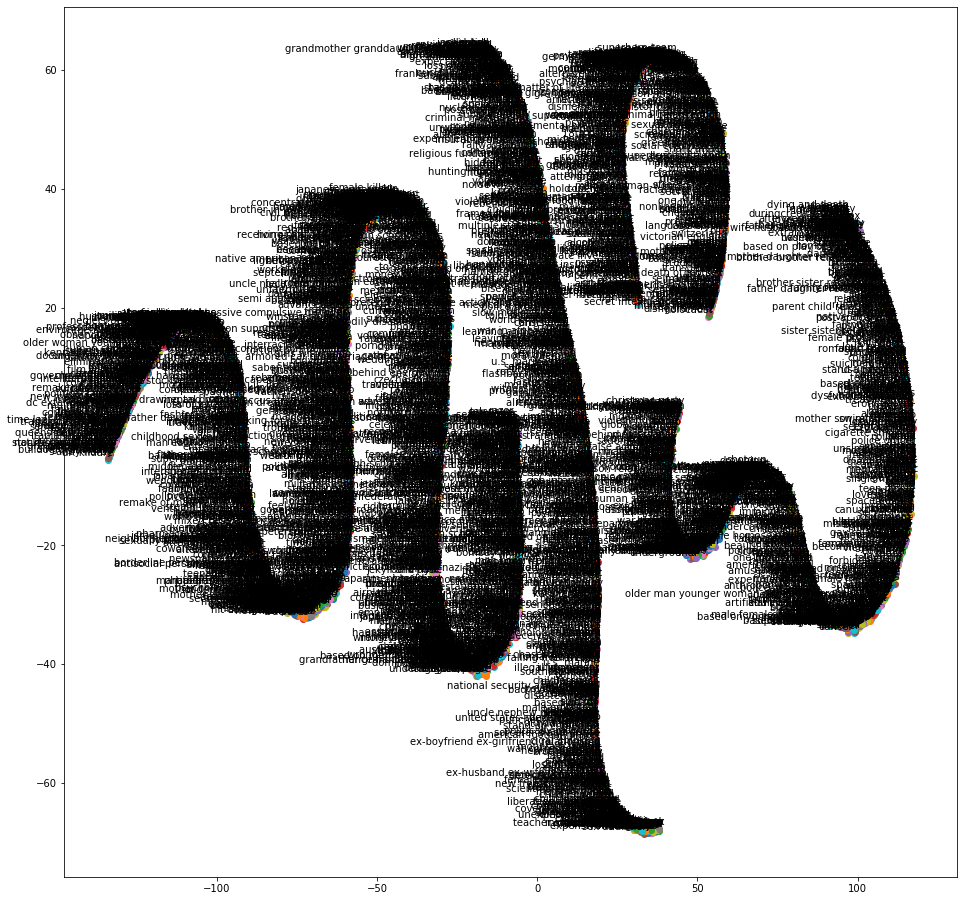

In [105]:
tsne_plot(model)

In [106]:
def temp_movies():# intermediary step to fix the rows with no vote count
    temp = bypop_final.apply(lambda x: pd.Series(x['original_title']),axis=1).stack().reset_index(level=1, drop=True)
    return(temp)
temp_movies = temp_movies()
def top_by_keywords(keyword):
    keyword = genre_reducing_error(keyword,temp_keywords.unique())
    j = []
    print ('most similar keywords to the keyword '+keyword+' :')
    for i in model.most_similar(keyword):
        print(i[0])
        j.append(bypop_final.iloc[temp_keywords[temp_keywords==i[0]].index]['original_title'].values)
    jj = []
    for i in j:
        for x in i:
            jj.append(x) 
    j= []
    for i in jj:
        j.append(temp_movies[temp_movies == i].index[0])
    return (bypop_final.iloc[j])
top_by_keywords('love').head(3)

most similar keywords to the keyword love :
friends
lesbian
marriage
party
girlfriend


C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


romance
road trip
friendship
teenage girl
dysfunctional family


,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
52,1422,The Departed,2006-10-05,"[Drama, Thriller, Crime]","[undercover, boston, police, friends, mafia, u...",Lies. Betrayal. Sacrifice. How far will you ta...,"To take down South Boston's Irish Mafia, the p...",18.515448,7.9,4455.0,"[Leonardo DiCaprio, Jack Nicholson, Martin She...","[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...",4,52
57,68718,Django Unchained,2012-12-25,"[Drama, Western]","[bounty hunter, hero, plantation, society, fri...","Life, liberty and the pursuit of vengeance.","With the help of a German bounty hunter, a fre...",19.785025,7.8,10297.0,"[Jamie Foxx, Leonardo DiCaprio, Samuel L. Jack...","[2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, ...",4,57
64,862,Toy Story,1995-10-30,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...",No tagline available,"Led by Woody, Andy's toys live happily in his ...",21.946943,7.7,5415.0,"[Tom Hanks, Don Rickles, Wallace Shawn, Annie ...","[2, 2, 2, 1, 2, 2, 2]",4,64


In [107]:
top_by_keywords('mystery').head(3)

most similar keywords to the keyword mystery :
priest
remake
insanity
betrayal
car crash
dark comedy
thief
reporter


C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


lawyer
deception


,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
145,18,The Fifth Element,1997-05-07,"[Adventure, Fantasy, Action, Thriller, Science...","[clone, taxi, cyborg, egypt, future, stowaway,...",There is no future without it.,"In 2257, a taxi driver is unintentionally give...",24.305260,7.3,3962.0,"[Bruce Willis, Ian Holm, Chris Tucker, Brion J...","[2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, ...",4,145
572,13223,Gran Torino,2008-12-09,[Drama],"[rape, war veteran, immigration, priest, gang,...",Ever come across somebody you shouldn't have m...,Walt Kowalski is a widower who holds onto his ...,14.794228,7.8,3181.0,"[Clint Eastwood, Bee Vang, Brian Haley, Dreama...","[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3,117
575,314365,Spotlight,2015-11-06,"[Drama, Thriller, History]","[child abuse, journalism, judge, florida, bost...",Break the story. Break the silence.,The true story of how The Boston Globe uncover...,14.632390,7.8,2751.0,"[Mark Ruffalo, Rachel McAdams, John Slattery, ...","[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3,120


# Recomend movie by gender majority preference

In [108]:
bypop_final['gender'] = bypop_final['gender'].apply(literal_eval)
temp_gender = bypop_final.apply(lambda x: pd.Series(x['gender']),axis=1).stack().reset_index(level=1, drop=True)

C:\Users\Elarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [109]:
bypop_final.head(10)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"[Comedy, Drama, Romance]",[musical],Come... Fall In Love,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,9.1,661.0,"[Shah Rukh Khan, Amrish Puri, Satish Shah, Him...","[2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1]",4,0
1,278,The Shawshank Redemption,1994-09-23,"[Drama, Crime]","[prison, corruption, police brutality, prison ...",Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...,51.645403,8.5,8358.0,"[Tim Robbins, Bob Gunton, Mark Rolston, Gil Be...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,1
2,238,The Godfather,1972-03-14,"[Drama, Crime]","[italy, love at first sight, loss of father, p...",An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,8.5,6024.0,"[Marlon Brando, James Caan, Robert Duvall, Joh...","[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, ...",4,2
3,372058,君の名は。,2016-08-26,"[Romance, Animation, Drama]","[supernatural, romance, school, star crossed l...",No tagline available,High schoolers Mitsuha and Taki are complete s...,34.461252,8.5,1030.0,"[Ryunosuke Kamiki, Masami Nagasawa, Ryou Narit...","[2, 1, 2, 2, 1, 1, 1]",4,3
4,155,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]","[dc comics, crime fighter, secret identity, sc...",Why So Serious?,Batman raises the stakes in his war on crime. ...,123.167259,8.3,12269.0,"[Christian Bale, Heath Ledger, Gary Oldman, Mo...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, ...",4,4
5,550,Fight Club,1999-10-15,[Drama],"[support group, dual identity, nihilism, rage ...",Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,63.869599,8.3,9678.0,"[Edward Norton, Meat Loaf, Helena Bonham Carte...","[2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,5
6,680,Pulp Fiction,1994-09-10,"[Thriller, Crime]","[transporter, brothel, drug dealer, boxer, mas...",Just because you are a character doesn't mean ...,"A burger-loving hit man, his philosophical par...",140.950236,8.3,8670.0,"[John Travolta, Uma Thurman, Ving Rhames, Eric...","[2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, ...",4,6
7,424,Schindler's List,1993-11-29,"[Drama, History, War]","[factory, concentration camp, hero, holocaust,...","Whoever saves one life, saves the world entire.",The true story of how businessman Oskar Schind...,41.725123,8.3,4436.0,"[Liam Neeson, Ralph Fiennes, Jonathan Sagall, ...","[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1]",4,7
8,244786,Whiplash,2014-10-10,[Drama],"[jazz, obsession, conservatory, music teacher,...",The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ...",64.299990,8.3,4376.0,"[Miles Teller, Melissa Benoist, Jayson Blair, ...","[2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, ...",4,8
9,129,千と千尋の神隠し,2001-07-20,"[Fantasy, Adventure, Animation, Family]","[witch, parent child relationship, magic, dark...",The tunnel led Chihiro to a mysterious town...,A ten year old girl who wanders away from her ...,41.048867,8.3,3968.0,"[Rumi Hiiragi, Mari Natsuki, Yumi Tamai, Takas...","[2, 1, 2, 1, 1, 2, 2, 2]",4,9


In [110]:
def cast_gender_pref(boolean):#True for female and False for male
    indices = []
    for v,i in enumerate(bypop_final['gender']):
        j = []
        for x in i:
            j.append(x)
        j = np.array(j)
        if boolean:
            boolean0 = len(j[j==1]) > len(j[j==2])
        else:
            boolean0 = len(j[j==1]) < len(j[j==2])
        if boolean0:
            indices.append(v)
            #print(bypop_final['original_title'].iloc[v])
    return bypop_final.iloc[indices]
cast_gender_pref(False)

,id,original_title,release_date,genres,keywords,tagline,overview,popularity,vote_average,vote_count,names,gender,f_order,s_order
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"[Comedy, Drama, Romance]",[musical],Come... Fall In Love,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,9.1,661.0,"[Shah Rukh Khan, Amrish Puri, Satish Shah, Him...","[2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1]",4,0
1,278,The Shawshank Redemption,1994-09-23,"[Drama, Crime]","[prison, corruption, police brutality, prison ...",Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...,51.645403,8.5,8358.0,"[Tim Robbins, Bob Gunton, Mark Rolston, Gil Be...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,1
2,238,The Godfather,1972-03-14,"[Drama, Crime]","[italy, love at first sight, loss of father, p...",An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,8.5,6024.0,"[Marlon Brando, James Caan, Robert Duvall, Joh...","[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, ...",4,2
4,155,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]","[dc comics, crime fighter, secret identity, sc...",Why So Serious?,Batman raises the stakes in his war on crime. ...,123.167259,8.3,12269.0,"[Christian Bale, Heath Ledger, Gary Oldman, Mo...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, ...",4,4
5,550,Fight Club,1999-10-15,[Drama],"[support group, dual identity, nihilism, rage ...",Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,63.869599,8.3,9678.0,"[Edward Norton, Meat Loaf, Helena Bonham Carte...","[2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45386,177714,Mágica Aventura,1973-06-09,[],"[cartoon, animation]",No tagline available,No Overview available,0.000001,0.0,0.0,"[Ángela González, Carlos Revilla, Matilde F. V...","[2, 2, 2]",1,20903
45391,32594,Ecaterina Teodoroiu,1979-01-01,"[War, Drama]",[],No tagline available,"The story of heroine Ecaterina Teodoroiu, the ...",0.000000,0.0,0.0,"[Stela Furcovici, Mihai Mereuta, Cornel Coman]","[2, 2, 2]",1,21217
45394,288094,Casual Relations,1974-03-22,[Drama],[],No tagline available,In Rappaport’s dazzling and bizarre feature-le...,0.000000,0.0,0.0,[Mark Rappaport],[2],1,20652
45400,417399,Pilvilinna,1970-11-27,"[Drama, Comedy]",[],No tagline available,Teenager Erik returns from Paris to Finland in...,0.000000,0.0,0.0,"[Erik Uddström, Ritva Laatto, Ture Junttu, Mar...","[2, 2, 2, 1]",1,20358
